ERROR: [[0.16948471]]
WEIGHTS: [[0.11855175]
 [0.5926041 ]]
ERROR: [[0.16819793]]
WEIGHTS: [[0.11783793]
 [0.59613025]]
ERROR: [[0.11864029]]
WEIGHTS: [[0.06122105]
 [0.80036992]]
ERROR: [[0.11338338]]
WEIGHTS: [[0.03134397]
 [0.86296583]]
ERROR: [[0.11275571]]
WEIGHTS: [[0.01756478]
 [0.88270124]]
ERROR: [[0.11267325]]
WEIGHTS: [[0.01161157]
 [0.8891152 ]]
ERROR: [[0.1126617]]
WEIGHTS: [[0.00913244]
 [0.89126459]]
ERROR: [[0.11266002]]
WEIGHTS: [[0.00812298]
 [0.89200617]]
ERROR: [[0.11265977]]
WEIGHTS: [[0.00771782]
 [0.89226881]]
ERROR: [[0.11265974]]
WEIGHTS: [[0.00755674]
 [0.89236392]]
ERROR: [[0.11265973]]
WEIGHTS: [[0.00749311]
 [0.89239899]]


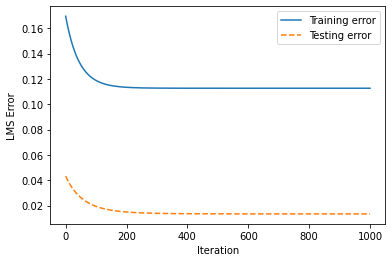

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
class LinearRegression:
    
    def __init__(self, dataFilePath, outputPath, alpha=0.01, 
                 maxIter = 500, errorThreshold=0.001, 
                 performTest = False, normalize = False):

        self.dataFilePath = dataFilePath
        self.outputPath   = outputPath
        self.alpha        = alpha
        self.maxIter      = maxIter
        self.errorThreshold = errorThreshold
        self.performTest    = performTest
        self.normalize      = normalize

        self.loadDataFromFile()
        self.initWeights()

    '''NORMALIZAR OS DADOS USANDO Z_SCORE -> https://www.codecademy.com/articles/normalization'''
    def featureNormalize(self, X):
        #TODO: NORMALIZAR OS DADOS USANDO Z_SCORE
        X_Norm = X
        for i in range(len(X[0])):
            m = np.mean(X[:, i])
            s = np.std(X[:,i])
            X_Norm[:, i] = (X_Norm[:,i] - m) / s
        return X_Norm
        
        
    '''Carrega os dados de um arquivo, separado por ponto e vírgula'''
    def loadDataFromFile(self):
        #TODO: CARREGAR DADOS DO ARQUIVO
        datasetLoaded = np.loadtxt(self.dataFilePath, delimiter=";", skiprows=1)
        
        if self.normalize:
            datasetLoaded = self.featureNormalize(datasetLoaded)
        
        self.nExamples = datasetLoaded.shape[0] # Número de exemplos que foi carregado
        self.nAttributes = len(datasetLoaded[0]) # Número de atributos (colunas)
        
        if(self.performTest):
            nExamplesTest = int(self.nExamples/3.0)
            self.testData = np.ones(shape=(nExamplesTest, self.nAttributes)) # Cria matriz, de uns, com nExamplesTest linhas e nAttributes colunas
            self.testTarget = np.zeros(shape=(nExamplesTest,1)) # Cria matriz, de zeros, com nExamplesTest linhas e 1 coluna
            
            linesForTest = random.sample(range(0, self.nExamples), nExamplesTest) # Cria uma lista com números randomizados, que será utilizado para pegar as linhas que serão utilizadas como teste
            
            count = 0
            for line in linesForTest: # Monta os dados de teste, testData, e de objetivo, testTarget
                self.testData[count, 1] = datasetLoaded[line, :-1]
                self.testTarget[count] = datasetLoaded[line, -1]
                count+=1
            datasetLoaded = np.delete(datasetLoaded, linesForTest, 0) # Deleta as linhas que foram separadas para teste
            self.nExamples -= nExamplesTest # Diminui o número de exemplos, retirando a quantidade que foi separada para teste
        
        self.dataset = np.ones(shape=(self.nExamples, self.nAttributes)) # Cria matriz de uns, com número de linhas nExamples e número de colunas nAttributes
        self.dataset[:, 1:] = datasetLoaded[:, :-1] #X, Y -> X0, X1   -   Y    Cria matriz com os dados que será utilizado no treinamento, não copiando a coluna Y (objetivo)
        self.target = datasetLoaded[:, -1] # Cria matriz com os dados objetivos (Y)
        self.target.shape = (self.nExamples, 1) # Transforma a matriz para ficar com nExamples linhas e 1 coluna
        
        
    '''Inicializa os pesos de Theta0 e Theta1'''
    def initWeights(self):
        #TODO: INICIAR OS PESOS: THETA0 e THETA1
        self.weights = np.ones(shape=(self.nAttributes, 1)) # Cria uma matriz, de uns, com nAttributes linhas e 1 coluna
        for i in range (0, self.nAttributes):
            self.weights[i][0] = random.random() # Randomiza um número entre 0-1 -> https://docs.python.org/3/library/random.html#random.random
        
    '''Saída da função linear = Theta(transposto) * X'''
    def linearFunction(self, data):
        #TODO: SAIDA DA FUNCAO LINEAR = THETA(t) * X
        output = data.dot(self.weights) # Multiplicação(dot) da matriz data pela matriz weights
        return output

    '''Calcula o erro para um ponto'''
    def calculateError(self, data, target):
        #TODO: CALCULAR O ERRO PARA UM PONTO (não seria para todos os pontos, pois é calculado para toda matriz)
        output = self.linearFunction(data)  #[1.3, 4.5, 8.3, 4.5, 1.2]   Calcula a função linear
        error = output - target
        return error #[4.5, 8, 7.2, 5.6, 3.2]
        
    '''Calcula o erro quadrático para todos os pontos'''
    def squaredErrorCost(self, data, target):
        #TODO: CALCULAR O ERRO PARA TODOS OS PONTOS
        error = self.calculateError(data, target)
        squaredError = (1.0 / (2 * self.nExamples)) * (error.T.dot(error)) # Calculo do erro quadrático
        return squaredError
        
    '''Calcula o gradiente descendente'''
    def gradientDescent(self):
        #TODO: GRADIENTE DESCENDENTE
        cost = self.calculateError(self.dataset, self.target) # Calcula o erro
        for i in range(self.nAttributes):
            temp = self.dataset[:, i]
            temp.shape = (self.nExamples, 1)
            currentErrors = cost * temp
            self.weights[i][0] = self.weights[i][0] - self.alpha * ((1.0/self.nExamples) * currentErrors.sum()) # Realiza o calculo do gradiente descendente e atuliza os pesos
        

    def plotCostGraph(self, trainingErrorsList, testingErrorsList=None):
        xAxisValues = range(0, len(trainingErrorsList))
        line1 = plt.plot(xAxisValues, trainingErrorsList, label="Training error")
        if self.performTest:
            line2 = plt.plot(xAxisValues, testingErrorsList, linestyle="dashed", label="Testing error")

        plt.legend()
        plt.xlabel("Iteration")
        plt.ylabel("LMS Error")
        plt.savefig(self.outputPath + "/lms_error.png")
        plt.show()
        plt.close()

    def plotLineGraph(self, weightsToPlot, iteration):

        if self.performTest:
            dataToPlot   = np.append(self.dataset, self.testData,0)
            targetToPlot = np.append(self.target, self.testTarget,0)

        else:
            dataToPlot   = self.dataset
            targetToPlot = self.target


        xAxisValues = dataToPlot[:,1]
        yAxisValues = targetToPlot

        xMax = max(xAxisValues)
        xMin = min(xAxisValues)
        yMax = max(yAxisValues)

        axes = plt.gca()
        axes.set_xlim([0, xMax + 1])
        axes.set_ylim([0, yMax + 1])

        xLineValues = np.arange(xMin, xMax, 0.1)
        yLineValues = weightsToPlot[0] + xLineValues * weightsToPlot[1]

        plt.plot(xLineValues, yLineValues)
        plt.plot(xAxisValues, yAxisValues, 'o')
        plt.savefig(self.outputPath + "/line_" + str(iteration) + ".png")
        plt.close()

    '''Executa a regressão linear'''
    def run(self):
        #TODO: PRINCIPAL
        lmsError = self.squaredErrorCost(self.dataset, self.target) # Dataset: X0, X1  Target: Y  Calcula o erro quadrático
        count = 0 
        trainingErrors = list()
        testingErrors = list()
        trainingErrors.append(lmsError[0])
        
        if self.performTest:
            lmsTestError = self.squaredErrorCost(self.testData, self.testTarget) # Calcula o erro quadrático para os dados de teste
            testingErrors.append(lmsTestError[0])
        
        print("ERROR: " + str(lmsError))
        print("WEIGHTS: " + str(self.weights))
        
        while lmsError > self.errorThreshold and count < self.maxIter:
            self.gradientDescent() # Calcula o gradiente descendente
            
            lmsError = self.squaredErrorCost(self.dataset, self.target)
            trainingErrors.append(lmsError[0])
            
            if self.performTest:
                lmsTestError = self.squaredErrorCost(self.testData, self.testTarget)
                testingErrors.append(lmsTestError[0])
            
            if count % 100 == 0:
                print("ERROR: " + str(lmsError))
                print("WEIGHTS: " + str(self.weights))
                self.plotLineGraph(self.weights, count)
            count+=1
        
        if self.performTest:
            self.plotCostGraph(trainingErrors, testingErrors)
        else:
            self.plotCostGraph(trainingErrors)
            
        

if __name__ == '__main__':
        linReg = LinearRegression("./income.csv",
                              "./graficos/income", 
                              normalize=True, performTest=True, alpha=0.01, maxIter=1000)
        linReg.run()